In [1]:
import cv2
import numpy as np
import os ,sys
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import imutils
warnings.filterwarnings("ignore")


In [2]:
path = "/media/anand/polyglot/BraindataPY/"

In [3]:
def train_or_testset(x):
    yes = os.path.join(path,x,"yes/")
    no = os.path.join(path,x,"no/")
    dirlist = [no,yes]
    return dirlist
train_dirlist = train_or_testset("train/")       ####collecting training data


In [4]:
def show_file_details(directories):
    for dir in directories:
        print(len(os.listdir(dir)),"files in {}".format(dir.split("/")[-2]))
print("for train set")
show_file_details(train_dirlist)    

for train set
84 files in no
112 files in yes


In [5]:
test_dirlist = train_or_testset('test/')
print("for test set")####collecting testing data
show_file_details(test_dirlist)

for test set
14 files in no
43 files in yes


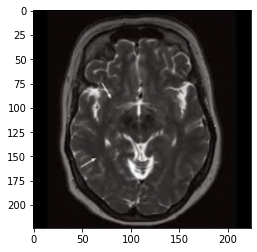

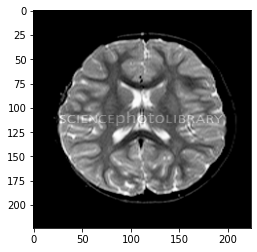

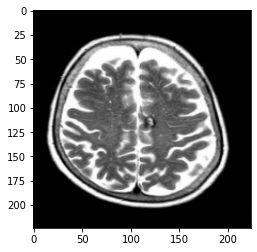

In [6]:
def display_image(directory,index):
    for file_name in os.listdir(directory[0])[:index]:
        image = cv2.imread(directory[0]+'/'+file_name)
        image = cv2.resize(image,(224,224))
        image = image/255
        #image = cv2.imread(os.path.join(dirlist[0],file_name))
        plt.imshow(image)
        plt.show()
display_image(train_dirlist,3)
    

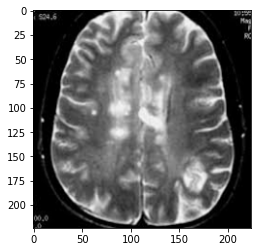

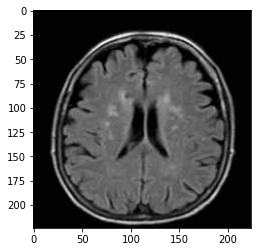

In [7]:
display_image(test_dirlist,2)

##### 

#### Here through a simple matplotlib plot we have figured out that pictures varied much in there regular pixel and size.

#### ========================================================== =============================

### Creating path, labels and image arrays for training dataset

In [8]:
label_dict = {"no":0, "yes":1}   ### To convert our labels to 1 or 0 values we can use this look up dict


def create_data_loader(dirlis,labellist,image_dtlst,image_pathlst):
    for files in dirlis:
        for j in os.listdir(files):
            image_path = os.path.join(files,j)
            labels = files.split("/")[-2]    ##Extracting labels
            #print(labels) 
            labellist.append(label_dict[labels])          ## appending labels
            file_path = os.path.join(files,j)
            image_pathlst.append(file_path)      ##Printing it
            #print(os.path.join(files,j))
            image = cv2.imread(image_path)
            image = cv2.resize(image,(224,224))
            image_array = np.array(image)   ## Its already a numpy array so we choose not to append this
            image_dtlst.append(image)
    print(len(labellist),":-sample label to show where actually it comes from",labels)
    print(len(image_pathlst),":-sample path to show where actually it comes from",image_path)
    print(len(image_dtlst))         #because rest is in test set  

In [9]:
label_train = []      ###declare a list for tracking target labels for training datas
images_train = []      ####assigning a list and storing image arrays of training images
image_paths_train = [] ###This is an optional step to keep a track on the train image datas path.
create_data_loader(train_dirlist,label_train,images_train,image_paths_train)        # dirlist[:-1] includes no and yes directories

196 :-sample label to show where actually it comes from yes
196 :-sample path to show where actually it comes from /media/anand/polyglot/BraindataPY/train/yes/Y99.JPG
196


In [10]:
label_test = []      ###declare a list for tracking target labels for testing datas
images_test = []      ####assigning a list and storing image arrays of testing images
image_paths_test = [] ###This is an optional step to keep a track on the test image datas path
create_data_loader(test_dirlist,label_test,images_test,image_paths_test)

57 :-sample label to show where actually it comes from yes
57 :-sample path to show where actually it comes from /media/anand/polyglot/BraindataPY/test/yes/Y9.jpg
57


In [11]:
print("train_set some samples") 
print(label_train[2])                             
print(images_train[2],images_train[2].shape)                             
print(image_paths_train[2])

train_set some samples
0
[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] (224, 224, 3)
/media/anand/polyglot/BraindataPY/train/no/N26.JPG


### shuffling training data as its the best practise before giving it to any ML model so we can prevent model from learning any series patterns

In [12]:
def shuffle_data(labelset,img_dataset,pathset):                                                     
    shuf_idx = [i for i in range(0,len(labelset))]    ##lst = [i for i in range(0,len(trainlbl))]                                                               
    labelset = np.array(labelset)                     ## random.shuffle(lst)
    img_dataset = np.array(img_dataset)               ## sett = trainlbl[lst]                                        
    pathset = np.array(pathset)                       ##  settpath = trainpath[lst]                                                                                     
    random.shuffle(shuf_idx)                          ##
    labelset = labelset[shuf_idx]
    img_dataset = img_dataset[shuf_idx]                                                         
    pathset = pathset[shuf_idx] 
    return labelset,img_dataset,pathset

##### creating shuffled set for train set

In [13]:
label_train,images_train,image_paths_train = shuffle_data(label_train,images_train,image_paths_train)

In [14]:
label_train[2:56]


array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [15]:
image_paths_train[0:8]

array(['/media/anand/polyglot/BraindataPY/train/no/11 no.jpg',
       '/media/anand/polyglot/BraindataPY/train/no/44no.jpg',
       '/media/anand/polyglot/BraindataPY/train/yes/Y254.jpg',
       '/media/anand/polyglot/BraindataPY/train/yes/Y111.JPG',
       '/media/anand/polyglot/BraindataPY/train/no/N15.jpg',
       '/media/anand/polyglot/BraindataPY/train/no/no 89.jpg',
       '/media/anand/polyglot/BraindataPY/train/no/no 94.jpg',
       '/media/anand/polyglot/BraindataPY/train/yes/Y20.jpg'],
      dtype='<U53')

#### creatiing shuffled set for test set  (This is optional also not recommnended)

In [16]:
label_test,images_test,image_paths_test = shuffle_data(label_test,images_test,image_paths_test)

In [17]:
label_test[2:12]

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [18]:
"""
 preprocesing data
"""
def preprocess(image):
    
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    #Converting the image to grayscale and blurring it a bit.
    grayscale = cv2.GaussianBlur(grayscale,(5,5),0)
    threshold_img = cv2.threshold(grayscale,45,255,cv2.THRESH_BINARY)[1]
    threshold_img = cv2.erode(threshold_img,None,iterations=2)
    threshold_img = cv2.dilate(threshold_img,None,iterations=2)#Find the contours in the image and grab out the largest one.
    contour = cv2.findContours(threshold_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = imutils.grab_contours(contour)
    C = max(contour, key = cv2.contourArea)
    ext_left = tuple(C[C[:,:,0].argmin()][0]) #finding the extreme points
    ext_right = tuple(C[C[:,:,0].argmax()][0])# Lateral sections.
    ext_top = tuple(C[C[:,:,1].argmin()][0])# Top and Bottom
    ext_bot = tuple(C[C[:,:,1].argmax()][0])
    new_image = image[ext_top[1]:ext_bot[1],ext_left[0]:ext_right[0]]
    return new_image
"""
 next resizing, final level preprocessing before giving it to a model.
"""
def fin_preprocess(images,train_feature_lst,labels):
    for img in images:
        image = cv2.imread(img)
        image = preprocess(image)
        image = cv2.resize(image,(224,224),interpolation=cv2.INTER_CUBIC)
        image = image/255 #Normalizing images
        train_feature_lst.append(image)
    return np.array(train_feature_lst),np.array(labels)

In [19]:
""" Extracting Final training set"""
X = [] #Final image feature map
X_train,y_train = fin_preprocess(image_paths_train,X,label_train)
print(y_train[2])    
X_train[2]

1


array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [20]:
"""Extracting final test set"""
X_testset = []
X_test,y_test = fin_preprocess(image_paths_test,X_testset,label_test)

In [21]:
X_test.shape


(57, 224, 224, 3)

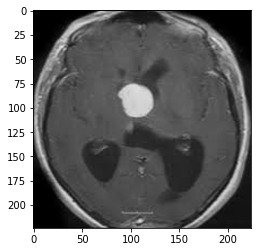

In [22]:
#Random train -set image
plt.imshow(X_train[2])
plt.show()


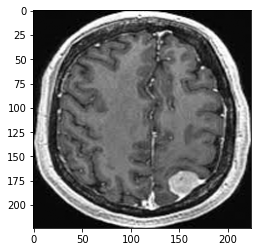

In [23]:
#Random test set image
plt.imshow(X_test[1])


### Model


#### A convolutional Neural Network based on pytorch framework.

In [24]:
#importing dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transform

In [25]:
class CNN(nn.Module):
    def __init__(self,in_channels=3,num_classes=2):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels=8,
                               kernel_size=(5,5),
                               stride =(1,1),
                               padding=(1,1)              # nout = [(nin + 2p - k)/s] + 1
                              )                            
        self.batnm1 = nn.BatchNorm2d(8)                   # [(224 + 2 . 1 - 5) / 1] + 1 = 222
        self.pool = nn.MaxPool2d(kernel_size=(2,2),       # after maxpooling 222 / 2 = 111
                                 stride=(2,2)
                                )                         #[(111 + 2 . 1 - 3) / 2] + 1 = 56
        self.conv2 = nn.Conv2d(in_channels=8,
                              out_channels=32,            # after maxpooling 56/2 = 28
                              kernel_size=(3,3),
                               stride=(2,2),
                               padding=(1,1)
                              )
        self.batnm2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(in_channels=32,
                              out_channels=64,            # (28 + 2 . 1 - 3) / 1] + 1 = 28
                              kernel_size=(3,3),
                               stride=(1,1),              # after maxapooling 28/2 = 14
                               padding=(1,1)
                              ) 
        self.batnm3 = nn.BatchNorm2d(64) #on forward pass we will again add another Maxpooling layer here
        self.fc1 = nn.Linear(64*14*14 ,num_classes)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.batnm1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.batnm2(x)
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.batnm3(x)
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        
        return x
    
# model = CNN()                       #Initial test 
# X = torch.randn(64,3,224,224)
# model(X).shape           #Output should be 64,2
      

In [26]:
#set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Initializing the network
model = CNN().to(device)
model.parameters

<bound method Module.parameters of CNN(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (batnm1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batnm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batnm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12544, out_features=2, bias=True)
)>

In [32]:
#parameters(user defined)
in_channels = 3
num_classes = 2
learning_rate = 0.001
BATCH_SIZE = 64
EPOCHS = 8

In [33]:
# Loss and Loss_function criterion
loss_function = nn.CrossEntropyLoss()   #As we are using cross entropy loss we dont have to use Softmax at the end
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

#### Train Network


In [29]:
# For that we need to convert our train and test set data labels to torch tensors
X_train = torch.tensor(X_train)
X_train = X_train.permute(0,3,2,1)  ## VERY ESSENTIAL AS TORCH EXPECTS INPUT TO BE IN THE CHANNEL FIRST MANNER AS LIKE
y_train = torch.tensor(y_train)             ## LIBTORCH
X_test = torch.tensor(X_test)
X_test = X_test.permute(0,3,2,1)                      
y_test = torch.tensor(y_test)

In [34]:
#ACTUAL TRAINING
final_losses = []
for epoch in range(EPOCHS):# here as we have already seperated Features and labels ,we have to
    for i in range(0,len(X_train),BATCH_SIZE):# Initiate a for loop which steps or iter train data by the steps of 
        #print(i,i+BATCH_SIZE)             #our user Defined BATCH_SIZE ,else if data is coming as a single unit,
                                            #Then we can use inbuilt torch "Dataloader" and enumerate data and labels using a single for loop
        X_train_batch = X_train[i : i+BATCH_SIZE].to(device=device) #converting data into "CUDA" or device standards
        y_train_batch = y_train[i : i+BATCH_SIZE].to(device=device)
        #Forward pass
        y_pred_outs = model(X_train_batch.float())  #should be converted to float otherwise it will throw a RUNTIME error of expecting DOUBLE
        loss = loss_function(y_pred_outs,y_train_batch.long())
        final_losses.append(loss)
        if epoch % 2 ==1:
            print("Epoch number:{} and loss:{}".format(epoch,loss.item()))
        #backward propagation
        optimizer.zero_grad()   #zero setting all the accumulated gradients
        loss.backward()
        optimizer.step()
        
                                  
                            

Epoch number:1 and loss:1.5281039476394653
Epoch number:1 and loss:3.3069279193878174
Epoch number:1 and loss:1.1281691789627075
Epoch number:1 and loss:0.36174535751342773
Epoch number:3 and loss:0.5008028149604797
Epoch number:3 and loss:1.726012110710144
Epoch number:3 and loss:1.6305651664733887
Epoch number:3 and loss:0.00030921673169359565
Epoch number:5 and loss:0.7566078901290894
Epoch number:5 and loss:0.4762968420982361
Epoch number:5 and loss:0.32263821363449097
Epoch number:5 and loss:0.00021457401453517377
Epoch number:7 and loss:0.1765328347682953
Epoch number:7 and loss:0.11689465492963791
Epoch number:7 and loss:0.15508079528808594
Epoch number:7 and loss:4.475908281165175e-05


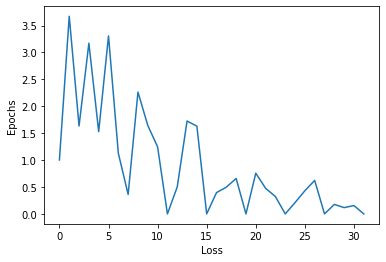

In [35]:
#plotting the loss value as 60 epochs runs for 4 batches it will be eventually 240 
plt.plot(range(32),final_losses)
plt.xlabel('Loss')
plt.ylabel("Epochs")
plt.show()

In [36]:
#checking accuracy
def check_accuracy(data,label,model):
#     if data.X_train:
#         print("checking accuracy on training data...")
#     else :
#         print("checking accuracy on testing data...")
        
    num_correct = 0
    num_samples = 0
    model.eval()
    with torch.no_grad():
        for i,datas in enumerate(data):
            datas = datas.unsqueeze(1)
            datas = datas.float()
            datas = datas.permute(1,0,2,3)
            
            x = datas.to(device=device)
            model_out = model(x)
            predicted_y = torch.argmax(model_out)
            print(predicted_y)
            real_y = torch.argmax(label[i].to(device=device))
            
            if predicted_y == real_y:
                num_correct += 1
            num_samples += 1

            
            
        print(f"Got {num_correct}/{num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
    model.train()

In [37]:
check_accuracy(X_test,y_test,model)

tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
Got 2/57 with accuracy 3.51


In [38]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        data = data.unsqueeze(1)
        data = data.float()
        data = data.permute(1,0,2,3)
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
score = accuracy_score(y_test,predictions)*100
score


80.7017543859649

#### An accuracy around 80 % is not bad for a Neural Network that runs for just 8 epochs with more epochs we can improve accuracy